In [234]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

In [22]:
# Set base URL
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

In [24]:
# API key portion of the URL
key = f'?registrationkey={api_key}'

In [69]:
# Entering unemployment rates by states into dictionary so they can remain easily identifiable, and to also be used
# in the DataFrame to give names to columns
series_dict = {
    'LASST060000000000003': 'California',
    'LASST120000000000003': 'Florida',
    'LASST480000000000003': 'Texas',
    'LASST530000000000003': 'Washington',
    'LASST360000000000003': 'New York'
}

# Define years for our search
years = ['2020', '2023']

# Follow specific format in BLS API format, requiring establishment of headers
headers = {'Content-type': 'application/json'}

In [70]:
# Use json.dumps to process parameters into dictionary
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": years[0],
    "endyear": years[1]})

In [73]:
# Use json.post to request data
p = requests.post(
    '{}{}'.format(url, key), # this will enter the base URL + and API key into one string
    headers=headers, # headers + data defined above
    data=data).json()['Results']['series'] # Include dictionary keys so that the final json variable 'p' will just show necessary data

In [81]:
# pretty print to get a clearer look at the json
print(json.dumps(p, indent=4, sort_keys=True))

[
    {
        "data": [
            {
                "footnotes": [
                    {}
                ],
                "period": "M12",
                "periodName": "December",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M11",
                "periodName": "November",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M10",
                "periodName": "October",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M09",
                "periodName": "September",
                "value": "5.0",
                "year": "2023"
            },
            {


In [215]:
# Set date list which will serve as the index of our DataFrame. [1:] - slice everything after the first character.
# necessary for the "period" key, which lists months "M01", "M02", etc
date_list = [f"{x['year']}-{x['period'][1:]}-01" for x in p[0]['data']]

In [217]:
# Create empty DataFrame
unemployment_df = pd.DataFrame()

In [238]:
# Loop through lists in the json 'p', return seriesID - reference series_dict to name column in DataFrame.
# Then, use list comprehension to collect values from json into dataframe series, and cast values as float.
for x in p:
    unemployment_df[series_dict[x['seriesID']]] = pd.Series(index= pd.to_datetime(date_list),data = [i['value'] for i in x['data']]).astype(float)

In [239]:
# Sort dataframe's index in ascending order
unemployment_df = unemployment_df.sort_index(ascending=True)

In [240]:
# Preview DataFrame
unemployment_df.head()

,California,Florida,Texas,Washington,New York
2020-01-01,4.3,3.0,3.5,3.7,4.1
2020-02-01,4.4,3.0,3.6,3.8,4.1
2020-03-01,5.5,4.1,5.0,5.2,4.2
2020-04-01,16.1,13.4,12.8,16.7,15.6
2020-05-01,15.8,14.2,11.6,13.4,16.7


<Axes: >

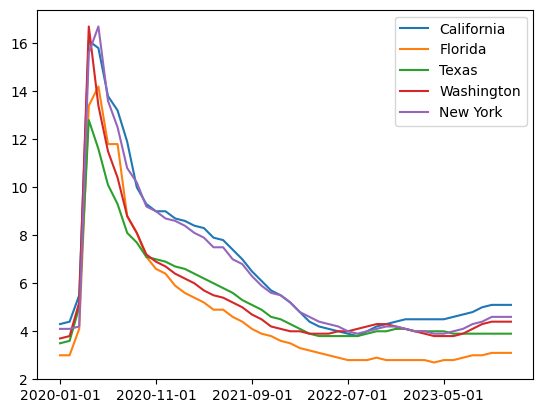

In [241]:
unemployment_df.plot()

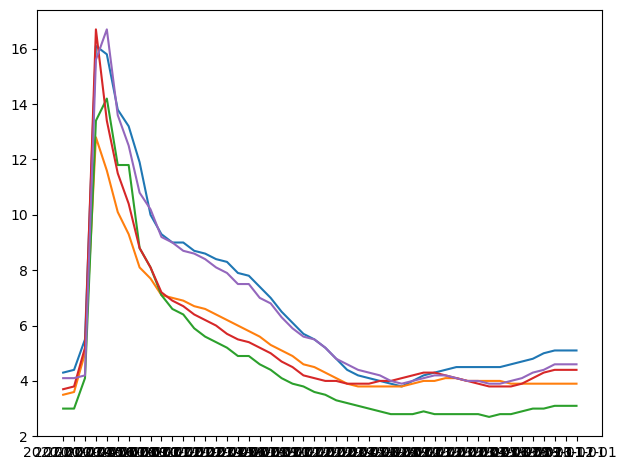

In [255]:
plt.plot(unemployment_df.index,unemployment_df['California'])
plt.plot(unemployment_df.index,unemployment_df['Texas'])
plt.plot(unemployment_df.index,unemployment_df['Florida'])
plt.plot(unemployment_df.index,unemployment_df['Washington'])
plt.plot(unemployment_df.index,unemployment_df['New York'])
plt.tight_layout()
plt.show()